[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

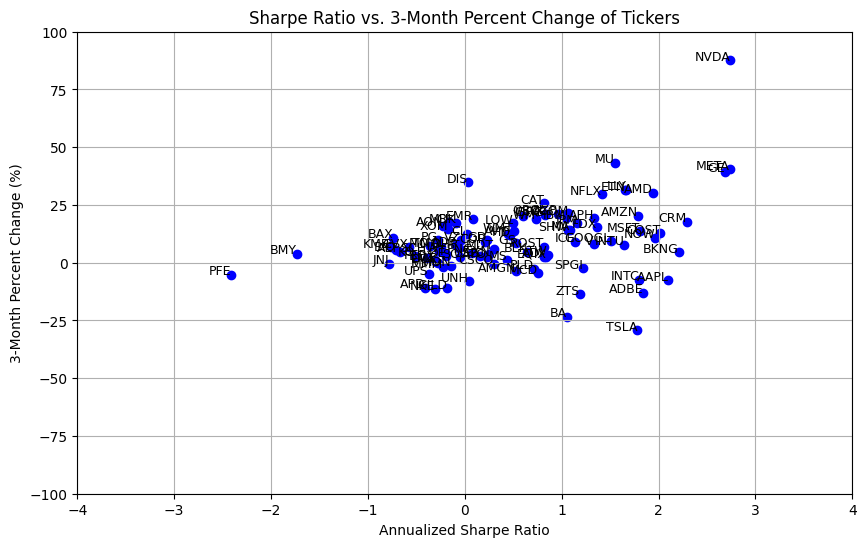

In [23]:

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define tickers directly in the code
tickers = ['AAPL', 'MSFT', 'GOOGL', 'TSLA', 'AMZN', 'NVDA', 'META', 'JNJ', 'JPM', 'V', 'PG', 'UNH', 'HD', 'MA', 
           'DIS', 'NFLX', 'ADBE', 'KO', 'PEP', 'XOM', 'VZ', 'INTC', 'MRK', 'T', 'CSCO', 'PFE', 'CRM', 'BMY', 'QCOM', 
           'WMT', 'NKE', 'ORCL', 'LLY', 'COST', 'MCD', 'AMGN', 'DHR', 'UPS', 'TXN', 'MDT', 'GS', 'HON', 'IBM', 
           'MS', 'BLK', 'LOW', 'BA', 'CVX', 'SPGI', 'CAT', 'GE', 'NOW', 'MMM', 'ISRG', 'INTU', 'SYK', 'PLD', 
           'SCHW', 'BKNG', 'ZTS', 'TMO', 'CI', 'LMT', 'C', 'AXP', 'MU', 'AMD', 'DE', 'MO', 'FDX', 'GILD', 'DUK', 
           'AEP', 'CL', 'KMB', 'SO', 'ADP', 'PNC', 'USB', 'COP', 'BDX', 'ADI', 'WM', 'ETN', 'ICE', 'F', 'EMR', 
           'ROST', 'AON', 'ITW', 'GD', 'SHW', 'EQIX', 'APD', 'APH', 'ATO', 'AVY', 'BAX', 'BIO']

# Define historical and future date ranges
start_date = "2023-01-01"
end_date = "2024-01-01"
future_start_date = "2024-01-01"
future_end_date = "2024-04-01"

# Download historical data and calculate Sharpe ratios
data = {}
for ticker in tickers:
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    if not stock_data.empty:
        data[ticker] = stock_data['Adj Close']
    else:
        print(f"No data found for ticker: {ticker}")

df = pd.DataFrame(data)
df.fillna(method='ffill', inplace=True)
df.dropna(inplace=True)

# Calculate daily returns
daily_returns = df.pct_change().dropna()

# Set risk-free rate and trading days
risk_free_rate = 0.0431  # Annual risk-free rate (4.31%)
trading_days = 252  # Commonly used trading days in a year for annualization

# Improved Sharpe Ratio calculation
sharpe_ratios = {}
for ticker in tickers:
    avg_daily_return = daily_returns[ticker].mean()
    std_dev_daily_return = daily_returns[ticker].std()
    
    # Calculate annualized return and volatility
    annualized_return = avg_daily_return * trading_days
    annualized_volatility = std_dev_daily_return * (trading_days ** 0.5)
    
    # Calculate Sharpe Ratio if volatility is not zero
    if annualized_volatility != 0:
        sharpe_ratio = (annualized_return - risk_free_rate) / annualized_volatility
        sharpe_ratios[ticker] = sharpe_ratio
    else:
        print(f"Standard deviation is zero for {ticker}, unable to calculate Sharpe ratio.")

# Download future data and calculate percent change
percent_changes = {}
for ticker in tickers:
    future_data = yf.download(ticker, start=future_start_date, end=future_end_date)
    if not future_data.empty:
        start_price = future_data['Adj Close'].iloc[0]
        end_price = future_data['Adj Close'].iloc[-1]
        percent_change = ((end_price - start_price) / start_price) * 100
        percent_changes[ticker] = percent_change
    else:
        print(f"No future data found for ticker: {ticker}")

# Filter tickers with valid Sharpe ratios and percent changes
filtered_sharpe_ratios = {ticker: sharpe_ratios[ticker] for ticker in tickers if ticker in sharpe_ratios and ticker in percent_changes}
filtered_percent_changes = {ticker: percent_changes[ticker] for ticker in tickers if ticker in sharpe_ratios and ticker in percent_changes}

# Plot Sharpe ratio vs. Percent change
plt.figure(figsize=(10, 6))
plt.scatter(filtered_sharpe_ratios.values(), filtered_percent_changes.values(), color='blue')

# Add labels for each ticker
for ticker, sharpe_ratio in filtered_sharpe_ratios.items():
    plt.text(sharpe_ratio, filtered_percent_changes[ticker], ticker, fontsize=9, ha='right')

# Set plot limits and labels
plt.xlim(-4, 4)
plt.ylim(-100, 100)
plt.xlabel("Annualized Sharpe Ratio")
plt.ylabel("3-Month Percent Change (%)")
plt.title("Sharpe Ratio vs. 3-Month Percent Change of Tickers")
plt.grid(True)

# Show the plot
plt.show()


In [15]:
import yfinance as yf

# List of 100 tickers to test
tickers = [
    "AAPL", "MSFT", "GOOGL", "TSLA", "AMZN", "NVDA", "META", "BRK.B", "JNJ", "JPM",
    "V", "PG", "UNH", "HD", "MA", "DIS", "NFLX", "ADBE", "KO", "PEP",
    "XOM", "VZ", "INTC", "MRK", "T", "CSCO", "PFE", "CRM", "BMY", "QCOM",
    "WMT", "NKE", "ORCL", "LLY", "COST", "MCD", "AMGN", "DHR", "UPS", "TXN",
    "MDT", "GS", "HON", "IBM", "MS", "BLK", "LOW", "BA", "CVX", "SPGI",
    "CAT", "GE", "NOW", "MMM", "ISRG", "INTU", "SYK", "PLD", "SCHW", "BKNG",
    "ZTS", "TMO", "CI", "LMT", "C", "AXP", "MU", "AMD", "DE", "MO",
    "FDX", "GILD", "DUK", "AEP", "CL", "KMB", "SO", "ADP", "PNC", "USB",
    "COP", "BDX", "ADI", "WM", "ETN", "ICE", "F", "EMR", "ROST", "AON",
    "ITW", "GD", "SHW", "EQIX", "APD", "APH", "ATO", "AVY", "BAX", "BIO"
]

# Verify tickers with yfinance to ensure they have data
valid_tickers = []
for ticker in tickers:
    try:
        stock_data = yf.download(ticker, start="2023-01-01", end="2023-01-10")
        if not stock_data.empty:
            valid_tickers.append(ticker)
    except Exception as e:
        print(f"Error with ticker {ticker}: {e}")

# Print the valid tickers
print("Valid tickers:")
print(valid_tickers)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['BRK.B']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[***

Valid tickers:
['AAPL', 'MSFT', 'GOOGL', 'TSLA', 'AMZN', 'NVDA', 'META', 'JNJ', 'JPM', 'V', 'PG', 'UNH', 'HD', 'MA', 'DIS', 'NFLX', 'ADBE', 'KO', 'PEP', 'XOM', 'VZ', 'INTC', 'MRK', 'T', 'CSCO', 'PFE', 'CRM', 'BMY', 'QCOM', 'WMT', 'NKE', 'ORCL', 'LLY', 'COST', 'MCD', 'AMGN', 'DHR', 'UPS', 'TXN', 'MDT', 'GS', 'HON', 'IBM', 'MS', 'BLK', 'LOW', 'BA', 'CVX', 'SPGI', 'CAT', 'GE', 'NOW', 'MMM', 'ISRG', 'INTU', 'SYK', 'PLD', 'SCHW', 'BKNG', 'ZTS', 'TMO', 'CI', 'LMT', 'C', 'AXP', 'MU', 'AMD', 'DE', 'MO', 'FDX', 'GILD', 'DUK', 'AEP', 'CL', 'KMB', 'SO', 'ADP', 'PNC', 'USB', 'COP', 'BDX', 'ADI', 'WM', 'ETN', 'ICE', 'F', 'EMR', 'ROST', 'AON', 'ITW', 'GD', 'SHW', 'EQIX', 'APD', 'APH', 'ATO', 'AVY', 'BAX', 'BIO']
